In [2]:
pip install imageio numpy scipy

<ipython-input-7-9a5e503b9798>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


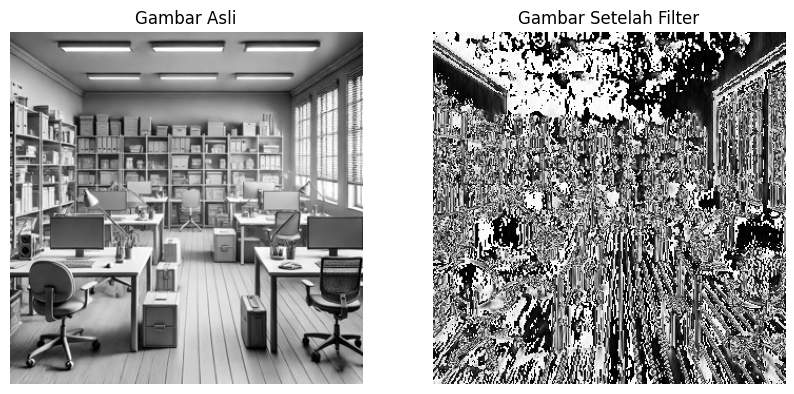

Gambar hasil filter telah disimpan di output_image.jpg


In [7]:
import imageio
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Fungsi untuk membaca gambar
def read_image(image_path):
    # Membaca gambar dan mengonversinya menjadi array numpy
    image = imageio.imread(image_path)
    return image

# Fungsi untuk menerapkan filter konvolusi menggunakan scipy.ndimage
def apply_filter(image):
    # Membuat filter kernel (misalnya, filter deteksi tepi sederhana Sobel)
    sobel_filter = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

    # Menerapkan filter menggunakan scipy.ndimage convolve
    filtered_image = ndimage.convolve(image, sobel_filter)
    return filtered_image

# Fungsi untuk menampilkan dan menyimpan gambar
def display_and_save_image(original, filtered, output_path):
    # Menampilkan gambar asli dan hasil filter
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Gambar Asli')
    axs[0].axis('off')

    axs[1].imshow(filtered, cmap='gray')
    axs[1].set_title('Gambar Setelah Filter')
    axs[1].axis('off')

    plt.show()

    # Menyimpan gambar hasil filter
    imageio.imwrite(output_path, filtered)
    print(f"Gambar hasil filter telah disimpan di {output_path}")

# Main function
def main():
    # Path gambar input dan output
    input_image_path = '/content/kantor.jpg'  # Ganti dengan path gambar yang Anda inginkan
    output_image_path = 'output_image.jpg'

    # Membaca gambar
    original_image = read_image(input_image_path)

    # Jika gambar berwarna, konversi ke grayscale
    if len(original_image.shape) == 3:
        original_image = np.mean(original_image, axis=2).astype(np.uint8)

    # Menerapkan filter konvolusi
    filtered_image = apply_filter(original_image)

    # Menampilkan dan menyimpan hasil gambar
    display_and_save_image(original_image, filtered_image, output_image_path)

if __name__ == '__main__':
    main()
